In [46]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def apply_stop_words_df(path ='../../data/predicted_prod_data.csv' ):
    df = pd.read_csv(path)
    stop = stopwords.words('english')
    clean_stop = lambda x: ' '.join([word for word in x.split() if word not in (stop)])
    df['text_clean'] = df['text'].apply(clean_stop)
    return df

In [28]:
def cleanse(row):
    row_clean = row.replace("-", " ")
    row_clean = re.sub("[\n]", " ",row_clean)
    row_clean = re.sub("[.!?/\()-,:]", "",row_clean)
    row_clean = row_clean.lower()
    return row_clean

In [33]:
def text_count(seq):
    text_dict = {}
    for row in seq:
        row_clean = cleanse(row)
        text = row_clean.split(" ")
        for word in text:
            if text != " ":
                if word.lower() not in text_dict.keys():
                    text_dict.update({f"{word.lower()}":1})
                else:
                    text_dict[f"{word.lower()}"]+=1

    return text_dict

In [36]:
df = apply_stop_words_df()
target_df = df[df.out == 1]
word_count = text_count(target_df.text_clean)

In [60]:
word_count_df = pd.DataFrame(word_count,index = [0]).rename(index = {0:'Word_Count'}).transpose()
word_count_df=word_count_qual.sort_values(by=word_count_qual.columns[0],ascending=False)
word_count_df['words'] = word_count_df.index

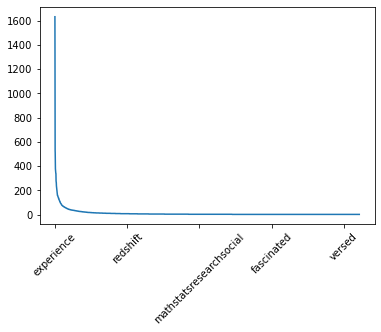

In [86]:
word_count_df['Word_Count'].plot()
plt.xticks(rotation = 45)
plt.show()

C:\Users\Emiliano\Anaconda3\envs\DataSci\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


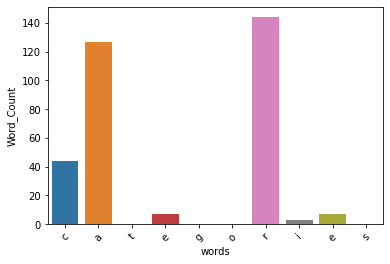

In [75]:
sns.barplot(word_count_df['words'],word_count_df['Word_Count'])
plt.xticks(rotation=45)
plt.show()